## Uniform

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli

# seaborn configuration
sns.set(color_codes=True)
sns.set(rc={"figure.figsize": (5,5)})

In [42]:
sm.__version__

'0.12.1'

In [14]:
def plot_distribution(data,title):
ax = ax.displot(data, bins=100, kde=True, color="skyblue", linewidth=1.5, alpha=1)
ax.set(xlabel=title, ylabel="Frequency")
plt.title(title)
plt.show()

IndentationError: expected an indented block (<ipython-input-14-f12aff3d68db>, line 2)

C:\Users\Lenovo\anaconda3\envs\hacktiv8-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

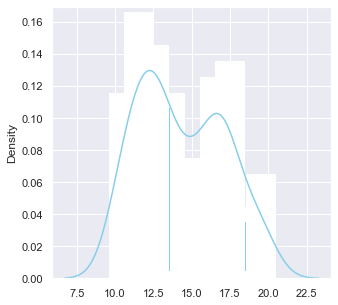

In [4]:
n = 100
start = 10
scale = 10
rv_uniform = uniform.rvs(loc=start, scale=scale, size=n)

#plot
sns.distplot(rv_uniform, bins=10, color="skyblue", hist_kws={"linewidth":15, "alpha":1})

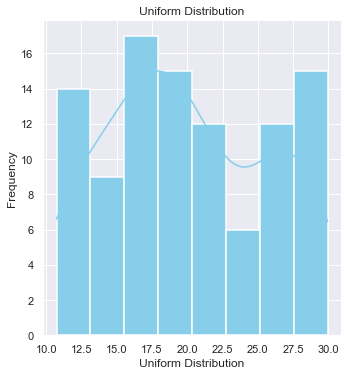

In [5]:
n = 100
loc = 10
scale = 20
rv_uniform = uniform.rvs(loc=loc, scale=scale, size=n)

#plot
ax = sns.displot(rv_uniform, color="skyblue", linewidth=1.5, alpha=1, kde=True)
ax.set(xlabel="Uniform Distribution", ylabel="Frequency")
plt.title("Uniform Distribution")
plt.show()

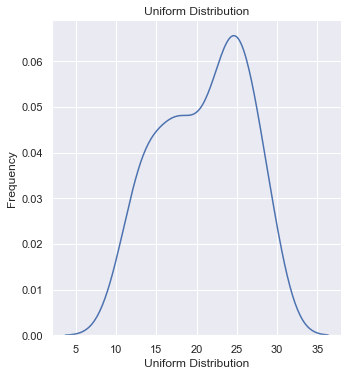

In [6]:
n = 100
loc = 10
scale = 20
rv_uniform = uniform.rvs(loc=loc, scale=scale, size=n)

#plot
ax = sns.displot(rv_uniform, kind="kde")
ax.set(xlabel="Uniform Distribution", ylabel="Frequency")
plt.title("Uniform Distribution")
plt.show()

## Normal 

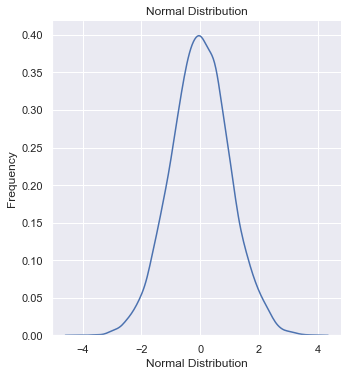

In [11]:
n = 10000
loc = 0
scale = 1
rv_normal = norm.rvs(loc=loc, scale=scale, size=n)

ax = sns.displot(rv_normal, kind="kde")
ax.set(xlabel="Normal Distribution", ylabel="Frequency")
plt.title("Normal Distribution")
plt.show()

##  Binomial

In [16]:
size = 1000
n = 10
p = .8
rv_binomial = binom.rvs(n=n, p=p, size=size)
plot_distribution(rv_binomial, f"Binomial Dist Success")

UnboundLocalError: local variable 'ax' referenced before assignment

In [18]:
size = 10000
p = .6
rv_bernoulli = bernoulli.rvs(p=p, size=size)
plot_distribution(rv_bernoulli, "Bernoulli Dist")

UnboundLocalError: local variable 'ax' referenced before assignment

In [20]:
np.random.seed(111)
np.random.normal(loc=0, scale=1, size=10)

array([-1.13383833,  0.38431919,  1.49655378, -0.3553823 , -0.78753354,
       -0.45943891, -0.05916877, -0.3541735 , -0.73552305, -1.18393989])

In [21]:
rng = np.random.default_rng(111)
rng.normal(loc=0, scale=1, size=10)

array([-0.30743784, -0.8386569 ,  0.12563787, -0.66067729,  0.15831516,
        2.43876182,  0.43963253,  0.77035284, -0.79443326, -0.90645504])

## Confidence Interval

In [24]:
heart = pd.read_csv("data/heart.csv")
print("Dataset shape :", heart.shape)
display(heart.head())

Dataset shape : (1025, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [25]:
heart["sex"] = heart.sex.replace({1: "Male", 0: "Female"})
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 112.2+ KB


In [33]:
heart.sex.value_counts()

Male      713
Female    312
Name: sex, dtype: int64

In [39]:
cross_tab = pd.crosstab(heart.target, heart.sex)

## CI Proportion

In [40]:
cross_tab["Total"] = cross_tab["Male"] + cross_tab["Female"]
cross_tab

sex,Female,Male,Total
target,,,
0,86,413,499
1,226,300,526


In [34]:
pop_female = 312
pop_male = 713

prop_female = 226 / pop_female
print("Proportion female having disease", prop_female)

Proportion female having disease 0.7243589743589743


In [35]:
stderr_female = np.sqrt(prop_female *(1-prop_female) / pop_female)
print("Standart error of female population", stderr_female)

Standart error of female population 0.02529714756803247


In [36]:
def compute_CI(estimate, stderr, z_score=1.96):
    return (
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )

In [53]:
lower_ci, upper_ci = compute_CI(prop_female, stderr_female)
print(f"CI for female proportion having disease: [{lower_ci:.3f}, {upper_ci:.3f}]")

CI for female proportion having disease: [0.675, 0.774]


In [54]:
lower_CI, upper_CI = sm.stats.proportion_confint(pop_female * prop_female, pop_female)
print(f"CI for female proportion having disease: [{lower_CI:.3f}, {upper_CI:.3f}]")

CI for female proportion having disease: [0.675, 0.774]


## CI Mean

In [55]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,Male,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,Male,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,Male,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,Female,0,138,294,1,1,106,0,1.9,1,3,2,0


In [56]:
heart.groupby("sex").aggregate({"chol": [np.mean, np.std, np.size]})

chol                
              mean        std size
sex                               
Female  261.455128  64.466781  312
Male    239.237027  43.155535  713

In [57]:
mean_female_chol = 261.465
std_female_chol = 64.466
n_female = 312
z = 1.96

stderr_mean_female = std_female_chol / np.sqrt(n_female)
print("Standart error mean of female chol", stderr_mean_female)

Standart error mean of female chol 3.649668564158275


In [58]:
lower_ci, upper_ci = compute_CI(mean_female_chol, stderr_mean_female)
print(f"CI for female proportion having disease: [{lower_ci:.3f}, {upper_ci:.3f}]")

CI for female proportion having disease: [254.312, 268.618]


## Hypothesis Testing

In [59]:
n = 1018
pnull = .52
phat = .56

In [62]:
sm.stats.proportions_ztest(phat * n, n, pnull, alternative="larger")

(2.571067795759113, 0.005069273865860533)

In [63]:
nhanes= pd.read_csv("data/nhanes_2015_2016.csv")
nhanes

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5730,93695,2.0,2.0,NaN,1,2,76,3,1.0,3.0,...,112.0,46.0,59.1,165.8,21.5,38.2,37.0,29.5,95.0,2.0
5731,93696,2.0,2.0,NaN,2,1,26,3,1.0,5.0,...,116.0,76.0,112.1,182.2,33.8,43.4,41.8,42.3,110.2,2.0
5732,93697,1.0,NaN,1.0,1,2,80,3,1.0,4.0,...,146.0,58.0,71.7,152.2,31.0,31.3,37.5,28.8,NaN,2.0
5733,93700,NaN,NaN,NaN,1,1,35,3,2.0,1.0,...,106.0,66.0,78.2,173.3,26.0,40.3,37.5,30.6,98.9,2.0


In [65]:
nhanes_female = nhanes[nhanes["RIAGENDR"] == 2]
nhanes_male = nhanes[nhanes["RIAGENDR"] == 1]

#num of observ
num_female = len(nhanes_female)
num_male = len(nhanes_male)

#mean
mean_female = nhanes_female.BMXBMI.mean()
mean_male = nhanes_male.BMXBMI.mean()

#stdev
std_female = nhanes_female.BMXBMI.std()
std_male = nhanes_male.BMXBMI.std()

In [66]:
sm.stats.ztest(nhanes_female.BMXBMI.dropna(), nhanes_male.BMXBMI.dropna(), alternative="two-sided")

(6.1755933531383205, 6.591544431126401e-10)